<a href="https://colab.research.google.com/github/mahendran-narayanan/Pytorch/blob/master/pytorch_2.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning model using Pytorch

Here MNIST dataset is used in order to develop a deep learning model with 2 layer CNN using PyTorch. Torch is the package name. Torchvision library contains pretrained models,datasets and some transformation functions

In [0]:
import torch 
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

## Device configuration

This model is trained on GPU if available else it will run on CPU.

In [0]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

## Hyper parameters

In [0]:
num_epochs = 5
num_classes = 10
batch_size = 4
learning_rate = 0.001

## Mnist Dataset and dataloader

Importing the dataset from torchvision library and dataloader helps in putting the inputs in batches.

In [4]:
train_dataset = torchvision.datasets.MNIST(root='../../data/',
                                           train=True, 
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../../data/',
                                          train=False, 
                                          transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size, 
                                          shuffle=False)




Extracting ../../data/MNIST/raw/train-images-idx3-ubyte.gz to ../../data/MNIST/raw



Extracting ../../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../../data/MNIST/raw



Extracting ../../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../../data/MNIST/raw



Extracting ../../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../../data/MNIST/raw
Processing...
Done!


## Visualizing the dataset

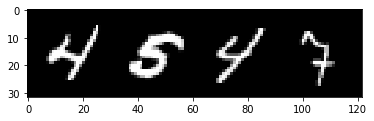

In [5]:
import matplotlib.pyplot as plt
import numpy as np
def imshow(img):
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg,(1,2,0)))

dataiter = iter(train_loader)
images,labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))

## Model
Convolutional neural network with 2 layers

In [0]:
class ConvNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.fc = nn.Linear(7*7*32, num_classes)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        return out

model = ConvNet(num_classes).to(device)


## Loss and optimizer

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

## Train the model

In [8]:
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    print ('Epoch {}, Loss: {:.4f}' 
                .format(epoch+1, loss.item()))

Epoch 1, Loss: 0.1415
Epoch 2, Loss: 0.0000
Epoch 3, Loss: 0.0030
Epoch 4, Loss: 0.0052
Epoch 5, Loss: 0.0000


## Test the model

In [11]:
model.eval()  
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))


Test Accuracy of the model on the 10000 test images: 99.03 %


In [0]:
# Save the model checkpoint
torch.save(model.state_dict(), 'model2.ckpt')